Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [52]:
df_docentes = pd.read_csv('in/docentes.csv', sep=',')
df_docentes.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


In [53]:
#1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

def descobre_qtd_professor_por_cat(df):
    categorias = df_docentes.categoria.unique()
    qtd_prof_categoria = []
    for i in categorias:
        qtd_prof_categoria.append(0)
    for i in df.categoria:
        idx = 0
        for j in categorias:
            if j == i:
                #print (j,i)
                qtd_prof_categoria[idx] = qtd_prof_categoria[idx] + 1
            idx = idx + 1
    ret_aux = []
    for i in range(len(categorias)):
        ret_aux.append([categorias[i], qtd_prof_categoria[i]])
    df_ret = pd.DataFrame(ret_aux, columns = ['categorias', 'total'])
    return df_ret
df_qtd_prof_categoria =  descobre_qtd_professor_por_cat(df_docentes)
df_qtd_prof_categoria.head()

,categorias,total
0,PERMANENTE,431
1,COLABORADOR,56


In [54]:
#2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?
df_discentes = pd.read_csv('in/discentes.csv', sep=',')
df_discentes.head()

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
3,"GUEDES, A. L. V. (Principal) GUEDES, ALAN LIVI...",INFORMÁTICA,12/03/2013,Não,565354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAN LIVIO VASCONCELOS GUEDES,SIMONE DINIZ JUNQUEIRA BARBOSA,"[{'nome': 'SIMONE DINIZ JUNQUEIRA BARBOSA', 'c...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO


In [55]:
def descobre_qtd_alunos_por_nivel(df):
    programa = df.programa.unique()
    nivel = df.nivel.unique()
    nivel = nivel[:2]
    qtd_prof_nivel = [0]*len(nivel)
    ret_aux = []
    linha_programa = []
    for p in programa:
        for i in range(len(df)):
            if p == df.programa.iloc[i]:
                idx = 0
                for n in nivel:
                    if n == df.nivel.iloc[i]:
                        qtd_prof_nivel[idx] = qtd_prof_nivel[idx] + 1 
                    idx = idx + 1
        for c in range(len(nivel)):
            ret_aux.append([p, nivel[c], qtd_prof_nivel[c]])
        linha_programa = []
    df_ret = pd.DataFrame(ret_aux, columns = ['programa', 'nivel', 'total'])
    return df_ret
df_qtd_alunos_por_nivel = descobre_qtd_alunos_por_nivel(df_discentes)
df_qtd_alunos_por_nivel.head(10)

,programa,nivel,total
0,INFORMÁTICA(31005012004P9),Mestrado,115
1,INFORMÁTICA(31005012004P9),Doutorado,102
2,CIÊNCIA DA COMPUTAÇÃO(42005019016P8),Mestrado,252
3,CIÊNCIA DA COMPUTAÇÃO(42005019016P8),Doutorado,193
4,COMPUTAÇÃO(31003010046P4),Mestrado,420
5,COMPUTAÇÃO(31003010046P4),Doutorado,307
6,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),Mestrado,690
7,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),Doutorado,500
8,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),Mestrado,1027
9,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),Doutorado,879


In [56]:
#3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?
def total_aluno(array_nivel, nivel):
    cont = 0
    for i in array_nivel:
        if nivel == i:
            cont = cont + 1
    return cont

alunos_mestrado = total_aluno(df_discentes.nivel, 'Mestrado')
alunos_doutorado = total_aluno(df_discentes.nivel, 'Doutorado')

total_prof_df = df_qtd_prof_categoria.total 
total_aluno_df = df_qtd_alunos_por_nivel.total
total_prof_permanente = total_prof_df[0]
total_aluno = total_aluno_df[0] + total_aluno_df[1]

print('Mestrado/ProfessorPermanente')
print('\t', alunos_mestrado/total_prof_permanente)
print('Doutorado/ProfessorPermanente')
print('\t', alunos_doutorado/total_prof_permanente)

print('(Mestrado+Doutorado)/ProfessorPermanente')
print('\t',(alunos_doutorado+alunos_mestrado)/total_prof_permanente)
y_total = [alunos_mestrado/total_prof_permanente, alunos_doutorado/total_prof_permanente, (alunos_doutorado+alunos_mestrado)/total_prof_permanente]

Mestrado/ProfessorPermanente
('\t', 4)
Doutorado/ProfessorPermanente
('\t', 3)
(Mestrado+Doutorado)/ProfessorPermanente
('\t', 8)


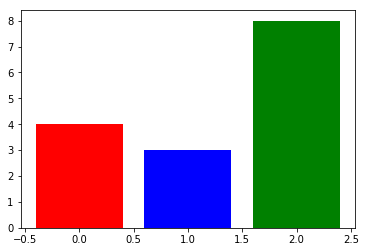

In [57]:
plot_bar = plt.bar(range(3), y_total, align='center', color = ['red', 'blue', 'green'])#, tick_label = ['Mestrado/ProfessorPermanente', 'Doutorado/ProfessorPermanente','(Mestrado+Doutorado)/ProfessorPermanente'])

In [58]:
#4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?
def plot_distribuicao(df):
    #professor = df.orientador.unique()
    #len(professor)
    programa = df.programa.unique()
    lst_aux = []
    #professor_do_programa = []
    #print('dfd')
    #for p in professor:
    ##    for i in range(len(df)):
    #        if p == df.orientador.iloc[i]:
    #            if df.programa.iloc[i] in professor_do_programa:
    #                pass
    #            else:
    #                professor_do_programa.append(df.programa.iloc[i])
    #    print professor_do_programa
    #    return
    #return
    
    for p in programa:
        for i in range(len(df)):
            if p == df.programa.iloc[i]:
                lst_aux.append([df.programa.iloc[i], df.orientador.iloc[i], df.nivel.iloc[i]])
    df_professor_do_programa = pd.DataFrame(lst_aux, columns = ['Programa','Professor','qtd_alunos'])
    grouped_professor_do_programa = df_professor_do_programa.groupby(['Programa','Professor']).count()
    
    
    
    return grouped_professor_do_programa
df_distribuicao = plot_distribuicao(df_discentes)
df_distribuicao.head()

qtd_alunos
Programa                             Professor                               
CIÊNCIA DA COMPUTAÇÃO(33002010176P0) ALAIR PEREIRA DO LAGO                  2
                                     ALAN MITCHELL DURHAM                   4
                                     ALFREDO GOLDMAN VEL LEJBMAN           12
                                     ANA CRISTINA VIEIRA DE MELO            8
                                     ANAROSA ALVES FRANCO BRANDAO           3

In [59]:
#5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?
df_trabalhos = pd.read_csv('in/trabalhos.csv', sep=',')
df_trabalhos.head()
print(df_trabalhos.tipo)

0             TESE
1      DISSERTAÇÃO
2      DISSERTAÇÃO
3      DISSERTAÇÃO
4             TESE
5      DISSERTAÇÃO
6      DISSERTAÇÃO
7      DISSERTAÇÃO
8             TESE
9      DISSERTAÇÃO
10            TESE
11     DISSERTAÇÃO
12     DISSERTAÇÃO
13     DISSERTAÇÃO
14     DISSERTAÇÃO
15     DISSERTAÇÃO
16     DISSERTAÇÃO
17     DISSERTAÇÃO
18     DISSERTAÇÃO
19            TESE
20            TESE
21            TESE
22            TESE
23            TESE
24     DISSERTAÇÃO
25            TESE
26            TESE
27     DISSERTAÇÃO
28     DISSERTAÇÃO
29            TESE
          ...     
612           TESE
613            NaN
614    DISSERTAÇÃO
615            NaN
616           TESE
617           TESE
618           TESE
619           TESE
620           TESE
621           TESE
622           TESE
623           TESE
624           TESE
625           TESE
626    DISSERTAÇÃO
627            NaN
628            NaN
629           TESE
630           TESE
631           TESE
632           TESE
633    DISSE

In [60]:
def total_defesas(array_tipo, tipo):
    cont = 0
    for i in array_tipo:
        if tipo == i:
            #print i
            cont = cont + 1
    return cont

defesa_tese = total_defesas(df_trabalhos.tipo, 'TESE')
defesa_dissertacao = total_defesas(df_trabalhos.tipo, 'DISSERTAÇÃO')
lst_alunos = df_trabalhos.autor.unique()
print('Total de alunos que defenderam suas dissertações/teses em 2017')
print(defesa_tese + defesa_dissertacao)

print('Total de alunos que defenderam suas teses em 2017')
print(defesa_tese)

print('Total de alunos que defenderam suas dissertações em 2017')
print(defesa_dissertacao)

Total de alunos que defenderam suas dissertações/teses em 2017
595
Total de alunos que defenderam suas teses em 2017
238
Total de alunos que defenderam suas dissertações em 2017
357


In [61]:
#6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?
def trabalho_por_area(df):
    area = df.area.unique()
    qtd_alunos_por_area = []
    for i in area:
        qtd_alunos_por_area.append(0)
    for i in df.area:
        idx = 0
        for j in area:
            if j == i:
                #print (j,i)
                qtd_alunos_por_area[idx] = qtd_alunos_por_area[idx] + 1
            idx = idx + 1
    ret_aux = []
    for i in range(len(area)):
        ret_aux.append([area[i], qtd_alunos_por_area[i]])
    df_ret = pd.DataFrame(ret_aux, columns = ['area', 'total'])
    return df_ret
df_trabalho_por_area =  trabalho_por_area(df_trabalhos)
df_trabalho_por_area

,area,total
0,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,4
1,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,9
2,ENGENHARIA DE SOFTWARE,5
3,BANCOS DE DADOS,8
4,LINGUAGENS DE PROGRAMAÇÃO,1
5,COMPUTAÇÃO GRÁFICA,6
6,INTERAÇÃO HUMANO-COMPUTADOR,2
7,TEORIA DA COMPUTAÇÃO,11
8,HIPERTEXTO E MULTIMÍDIA,2
9,-,5


In [62]:
#7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?
def defesas_pelo_tempo(df):
    #df_defesas_pelo_tempo = df[['data_defesa','tipo']].copy()
    #df.dropna(axis=0, thresh=1)
    lst_tese = [0]*12
    lst_diser = [0]*12
    meses = range(12)
    idx = 0
    #print ast.literal_eval('08')
    for i in range(len(df)):
        str_data = str(df.data_defesa.iloc[i])[3:5]
        print str_data, df.data_defesa.iloc[i]
        if str_data == '08':
            str_data = '8'
        elif str_data == '09':
            str_data = '9'
            
        if df.tipo.iloc[i] == 'TESE':
            #lst_tese.append([str_data, df.tipo.iloc[i]])
            idx = ast.literal_eval(str_data)
            lst_tese[idx - 1] = lst_tese[idx - 1] + 1
        else:
            idx = ast.literal_eval(str_data)
            lst_tese[idx - 1] = lst_tese[idx - 1] + 1
            #lst_diser.append([str_data, df.tipo.iloc[i]])
    #df_tese = pd.DataFrame(lst_tese, columns = ['Mes', 'Tipo'])
    #df_diser = pd.DataFrame(lst_diser, columns = ['Mes', 'Tipo'])
    return #df_tese, df_diser
#df_tese, df_diser = defesas_pelo_tempo(df_trabalhos)

#g = sns.factorplot(x="Mes", data=df_tese, kind="count", palette="BuPu", size=6, aspect=1.5, order='Mes')

In [63]:
#8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

def calcula_fracao(df, array_tese):
    df['Fracao'] = 0
    defesa_tese = total_defesas(array_tese, 'TESE')
    defesa_dissertacao = total_defesas(array_tese, 'DISSERTAÇÃO')
    
    for i in range(len(df)):
        if df.nivel.iloc[i] == 'Mestrado':
            df.Fracao.iloc[i] = (df.total.iloc[i]/float(defesa_tese))
        else:
            df.Fracao.iloc[i] = (df.total.iloc[i]/float(defesa_dissertacao))
    return df


qtd_discentes = len(df_discentes)
qtd_trabalhos = len(df_trabalhos)
calcula_fracao(df_qtd_alunos_por_nivel, df_trabalhos.tipo)

,programa,nivel,total,Fracao
0,INFORMÁTICA(31005012004P9),Mestrado,115,0.483193
1,INFORMÁTICA(31005012004P9),Doutorado,102,0.285714
2,CIÊNCIA DA COMPUTAÇÃO(42005019016P8),Mestrado,252,1.058824
3,CIÊNCIA DA COMPUTAÇÃO(42005019016P8),Doutorado,193,0.540616
4,COMPUTAÇÃO(31003010046P4),Mestrado,420,1.764706
5,COMPUTAÇÃO(31003010046P4),Doutorado,307,0.859944
6,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),Mestrado,690,2.899160
7,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),Doutorado,500,1.400560
8,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),Mestrado,1027,4.315126
9,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),Doutorado,879,2.462185


In [64]:
#9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?
df_producao = pd.read_csv('in/producao.csv', sep=',')
print df_producao.periodico[0]
df_producao.head()

(1532-0634) CONCURRENY AND COMPUTATION (ONLINE)


,anais_titulo,ano,area,cidade,dict_paper_autores,divulgacao,doi,edicao,editora,evento,...,paper_id,periodico,programa,projeto,serie,subtipo,tipo,titulo,url,volume
0,NaN,2017,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,New York,"[{'nome': 'BERTO DE TACIO PEREIRA GOMES', 'cat...",MEIO DIGITAL,DOI: 10.1002/cpe.4043,NaN,Wiley,NaN,...,5583631,(1532-0634) CONCURRENY AND COMPUTATION (ONLINE),INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A COMPREHENSIVE AND SCALABLE MIDDLEWARE FOR AM...,http://onlinelibrary.wiley.com/doi/10.1002/cpe...,29
1,Proceedings of XVI Brazilian Symposium of Comp...,2017,COMPUTAÇÃO GRÁFICA,Curitiba,"[{'nome': 'PEDRO IGOR PORFIRIO SAMPAIO', 'cate...",MEIO DIGITAL,NaN,16,NaN,Simposio Brasileiro de Jogos e Entretenimento ...,...,5310280,NaN,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,TRABALHO EM ANAIS,BIBLIOGRÁFICA,A FAST APPROACH FOR AUTOMATIC GENERATION OF PO...,http://https://www.sbgames.org/sbgames2017/pap...,1
2,NaN,2017,NaN,NaN,"[{'nome': 'MARCIO RICARDO ROSEMBERG', 'categor...",NaN,NaN,NaN,NaN,NaN,...,5733069,NaN,INFORMÁTICA (31005012004P9),NaN,NaN,OUTRO,BIBLIOGRÁFICA,A HYBRID BLOCK AND STREAM CIPHER ENCRYPTION AL...,NaN,NaN
3,NaN,2017,TEORIA DA COMPUTAÇÃO,Amsterdam,"[{'nome': 'FREDERICO GALAXE PAES', 'categoria'...",MEIO DIGITAL,10.1016/j.ejor.2016.07.022,NaN,Elsevier,NaN,...,5653523,(0377-2217) EUROPEAN JOURNAL OF OPERATIONAL RE...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A HYBRID GENETIC ALGORITHM WITH DECOMPOSITION ...,https://www.sciencedirect.com/science/article/...,256
4,NaN,2017,NÃO INFORMADA,-,"[{'nome': 'LUIS PAULO SANTOS VALENTE', 'catego...",MEIO DIGITAL,10.1007/s00779-017-1107-0,NaN,-,NaN,...,6293392,(1617-4909) PERSONAL AND UBIQUITOUS COMPUTING ...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A METHOD TO ASSESS PERVASIVE QUALITIES IN MOBI...,[doi:10.1007/s00779-017-1107-0],21


In [65]:
def descobre_qtd_anais_por_programa(df):
    programa = df.programa.unique()
    qtd_anais_programa = []
    for i in programa:
        qtd_anais_programa.append(0)
    for i in df.programa:
        idx = 0
        for j in programa:
            if j == i:
                #print (j,i)
                qtd_anais_programa[idx] = qtd_anais_programa[idx] + 1
            idx = idx + 1
    ret_aux = []
    for i in range(len(programa)):
        ret_aux.append([programa[i], qtd_anais_programa[i]])
    df_ret = pd.DataFrame(ret_aux, columns = ['programa', 'total'])
    return df_ret
descobre_qtd_anais_por_programa(df_producao)

,programa,total
0,INFORMÁTICA (31005012004P9),199
1,CIÊNCIA DA COMPUTAÇÃO (42005019016P8),238
2,COMPUTAÇÃO (31003010046P4),215
3,CIÊNCIAS DA COMPUTAÇÃO (32001010004P6),328
4,CIÊNCIAS DA COMPUTAÇÃO (25001019004P6),404
5,COMPUTAÇÃO (42001013004P4),407
6,INFORMÁTICA (31001017110P8),177
7,CIÊNCIA DA COMPUTAÇÃO (33003017005P8),271
8,CIÊNCIA DA COMPUTAÇÃO (33002010176P0),223
9,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...,385


In [66]:
#10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?
def total_artigos(array_artigo, tipo):
    cont = 0
    for i in array_artigo:
        if tipo == i:
            cont = cont + 1
    return cont
total_trabalho = total_artigos(df_producao.subtipo, 'TRABALHO EM ANAIS')
total_periodico = total_artigos(df_producao.subtipo, 'ARTIGO EM PERIÓDICO')

total_trabalhos = len(df_producao)
print('Total de trabalhos em anais por número de docentes permanentes')
print(total_trabalho/float(total_prof_permanente))

print('Total de periodico em anais por número de docentes permanentes')
print(total_periodico/float(total_prof_permanente))

Total de trabalhos em anais por número de docentes permanentes
3.49883990719
Total de periodico em anais por número de docentes permanentes
1.73317865429


In [67]:
#11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?
def extrai_total_coautoria_discentes(df):#dict_paper_autores
    autores = df.dict_paper_autores
    qtd_coautoria_discentes_trabalho = 0
    qtd_coautoria_discentes_periodico = 0
    for i in range(len(df)):
        if df.dict_paper_autores.iloc[i].count('iscente') > 0:
            if df_producao.subtipo.iloc[i] == 'TRABALHO EM ANAIS':
                qtd_coautoria_discentes_trabalho = qtd_coautoria_discentes_trabalho + 1
            else:
                qtd_coautoria_discentes_periodico = qtd_coautoria_discentes_periodico + 1
    return qtd_coautoria_discentes_trabalho, qtd_coautoria_discentes_periodico
qtd_coautoria_discentes_trabalho, qtd_coautoria_discentes_periodico = extrai_total_coautoria_discentes(df_producao)
print('fração de artigos de trabalhos em anais publicados que teve a coautoria de discentes')
print(qtd_coautoria_discentes_trabalho/float(total_trabalho))
print('fração de artigos de periódico em anais publicados que teve a coautoria de discentes')
print(qtd_coautoria_discentes_periodico/float(total_periodico))


fração de artigos de trabalhos em anais publicados que teve a coautoria de discentes
0.723474801061
fração de artigos de periódico em anais publicados que teve a coautoria de discentes
0.574297188755


In [68]:
#12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?
def extrai_total_coautoria_externo(df):
    autores = df.dict_paper_autores
    qtd_coautoria_discentes_trabalho = 0
    qtd_coautoria_discentes_periodico = 0
    for i in range(len(df)):
        if df.dict_paper_autores.iloc[i].count('Participante Externo') > 0:
            if df_producao.subtipo.iloc[i] == 'TRABALHO EM ANAIS':
                qtd_coautoria_discentes_trabalho = qtd_coautoria_discentes_trabalho + 1
            else:
                qtd_coautoria_discentes_periodico = qtd_coautoria_discentes_periodico + 1
    return qtd_coautoria_discentes_trabalho, qtd_coautoria_discentes_periodico
qtd_coautoria_discentes_trabalho, qtd_coautoria_discentes_periodico = extrai_total_coautoria_externo(df_producao)
print('fração de artigos de trabalhos em anais publicados que teve a coautoria de participantes externos')
print(qtd_coautoria_discentes_trabalho/float(total_trabalho))
print('fração de artigos de periódico em anais publicados que teve a coautoria de participantes externos')
print(qtd_coautoria_discentes_periodico/float(total_periodico))


fração de artigos de trabalhos em anais publicados que teve a coautoria de participantes externos
0.560344827586
fração de artigos de periódico em anais publicados que teve a coautoria de participantes externos
0.979919678715


In [69]:
#13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?
df_qualis = pd.read_excel('Qualis CC 2013-2016.xlsx', sheet_name='Qualis CC 2013-2016')#, columns = ['ISSN', 'Titulo', 'Estrato'])
#df_qualis = pd.read_csv('in/Qualis CC 2013-2016.csv',  sep=';')
df_qualis.columns = ['ISSN', 'Titulo', 'Estrato']
df_qualis.head()

,ISSN,Titulo,Estrato
0,0360-0300,ACM COMPUTING SURVEYS,A1
1,0730-0301,ACM TRANSACTIONS ON GRAPHICS,A1
2,0098-3500,ACM TRANSACTIONS ON MATHEMATICAL SOFTWARE,A1
3,0254-5330,ANNALS OF OPERATION RESEARCH,A1
4,1572-9338,ANNALS OF OPERATIONS RESEARCH (DORDRECHT. ONLINE),A1


In [72]:
def faz_join_qualis_producao(df_qualis, df_producao):
    #pd.merge(df_a, df_b, on='subject_id', how='outer')
    df_producao['ISSN'] = ''
    for i in range(len(df_producao)):
        if type(df_producao.periodico.iloc[i]) != float:
            df_producao.ISSN.iloc[i] = df_producao.periodico.iloc[i][1:10]
    new_df = pd.merge(df_qualis, df_producao, on='ISSN', how='inner')
    #for i in range(len(df_qualis)):
    #    for j in range(len(df_producao)):
    #        if type(df_qualis.ISSN.iloc[i]) != float  and type(df_producao.periodico.iloc[j]) != float:
    #            #print 'Entrei'
    #            #print df_qualis.ISSN.iloc[i],df_producao.periodico.iloc[j][1:10]
    #            if df_qualis.ISSN.iloc[i] == df_producao.periodico.iloc[j][1:10]:
    #                print 'Achei'
    return new_df
faz_join_qualis_producao(df_qualis, df_producao)

,ISSN,Titulo,Estrato,anais_titulo,ano,area,cidade,dict_paper_autores,divulgacao,doi,...,paper_id,periodico,programa,projeto,serie,subtipo,tipo,titulo,url,volume
0,0360-0300,ACM COMPUTING SURVEYS,A1,NaN,2017,Ciência de Dados e Engenharia de Software,-,"[{'nome': 'JHONNY MARCOS ACORDI MERTZ', 'categ...",MEIO DIGITAL,10.1145/3145813,...,5166493,(0360-0300) ACM COMPUTING SURVEYS,COMPUTAÇÃO (42001013004P4),NÃO INFORMADO,6,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,UNDERSTANDING APPLICATION-LEVEL CACHING IN WEB...,https://dl.acm.org/citation.cfm?id=3161158.314...,50
1,0360-0300,ACM COMPUTING SURVEYS,A1,NaN,2017,CIÊNCIA DA COMPUTAÇÃO,-,"[{'nome': 'CHAVES, ANA PAULA', 'categoria': 'S...",MEIO DIGITAL,10.1145/3124391,...,5556040,(0360-0300) ACM COMPUTING SURVEYS,CIÊNCIA DA COMPUTAÇÃO (33002010176P0),INCT da Internet do Futuro -- Desenvolvendo no...,6,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,SOFTWARE PLATFORMS FOR SMART CITIES,[doi:10.1145/3124391],50
2,0360-0300,ACM COMPUTING SURVEYS,A1,NaN,2017,CIÊNCIAS DE COMPUTAÇÃO E MATEMÁTICA COMPUTACI...,New York,"[{'nome': 'Charity Perera', 'categoria': 'Part...",MEIO DIGITAL,10.1145/3057266,...,5062588,(0360-0300) ACM COMPUTING SURVEYS,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...,NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,FOG COMPUTING FOR SUSTAINABLE SMART CITIES : A...,https://dl.acm.org/citation.cfm?id=3057266,50
3,0360-0300,ACM COMPUTING SURVEYS,A1,NaN,2017,CIÊNCIAS DE COMPUTAÇÃO E MATEMÁTICA COMPUTACI...,New York,"[{'nome': 'CHARITH PERERA', 'categoria': 'Sem ...",MEIO DIGITAL,doi.org/10.1145/3057266,...,5148005,(0360-0300) ACM COMPUTING SURVEYS,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...,NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,FOG COMPUTING FOR SUSTAINABLE SMART CITIES : A...,http://dx.doi.org/10.1145/3057266,50
4,0730-0301,ACM TRANSACTIONS ON GRAPHICS,A1,NaN,2017,Computação Visual,-,"[{'nome': 'EDUARDO SIMOES LOPES GASTAL', 'cate...",MEIO DIGITAL,10.1145/3072959.3073670,...,5105104,(0730-0301) ACM TRANSACTIONS ON GRAPHICS,COMPUTAÇÃO (42001013004P4),Filtragem em Espaços de Alta Dimensionalidade ...,4,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,SPECTRAL REMAPPING FOR IMAGE DOWNSCALING,https://dl.acm.org/citation.cfm?id=3073670,36
5,0254-5330,ANNALS OF OPERATION RESEARCH,A1,NaN,2017,ALGORITMOS E OTIMIZAÇÃO,-,"[{'nome': 'PUCA HUACHI VAZ PENNA', 'categoria'...",IMPRESSO,10.1007/s10479-017-2642-9,...,5648866,(0254-5330) ANNALS OF OPERATION RESEARCH,COMPUTAÇÃO (31003010046P4),PROJETO GESTÃO DA INFORMAÇÃO ATRAVÉS DA INTELI...,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A HYBRID HEURISTIC FOR A BROAD CLASS OF VEHICL...,-,259
6,0254-5330,ANNALS OF OPERATION RESEARCH,A1,NaN,2017,NÃO INFORMADA,-,"[{'nome': 'CARLOS VINICIUS GOMES COSTA LIMA', ...",MEIO DIGITAL,10.1007/s10479-017-2666-1,...,5809052,(0254-5330) ANNALS OF OPERATION RESEARCH,COMPUTAÇÃO (31003010046P4),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,AND/OR-CONVEXITY: A GRAPH CONVEXITY BASED ON P...,[doi:10.1007/s10479-017-2666-1],Press
7,0254-5330,ANNALS OF OPERATION RESEARCH,A1,NaN,2017,NÃO INFORMADA,-,"[{'nome': 'TEOBALDO LEITE BULHOES JUNIOR', 'ca...",IMPRESSO,10.1007/s10479-016-2261-x,...,5648622,(0254-5330) ANNALS OF OPERATION RESEARCH,COMPUTAÇÃO (31003010046P4),NÃO INFORMADO,2,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,NEW HEURISTICS FOR THE BICLUSTER EDITING PROBLEM,-,258
8,1568-4946,APPLIED SOFT COMPUTING (PRINT),A1,NaN,2017,CIÊNCIA DA COMPUTAÇÃO,-,"[{'nome': 'JONATAS WEHRMANN', 'categoria': 'Di...",VÁRIOS,10.1016/j.asoc.2017.08.029,...,5487863,(1568-4946) APPLIED SOFT COMPUTING (PRINT),CIÊNCIA DA COMPUTAÇÃO (42005019016P8),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,MOVIE GENRE CLASSIFICATION: A MULTI-LABEL APPR...,-,61
9,1568-4946,APPLIED SOFT COMPUTING (PRINT),A1,NaN,2017,INTELIGÊNCIA COMPUTACIONAL,-,"[{'nome': 'TARCISIO DANIEL PONTES LUCAS', 'cat...",VÁRIOS,10.1016/j.asoc.2017.05.048,...,5521612,(1568-4946) APPLIED SOFT COMPUTING (PRINT),CIÊNCIAS DA COMPUTAÇÃO (25001019004P6),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A NEW EV

In [ ]:
def descobre_qtd_titulo_por_extrato(df):
    estrato = df.Estrato.unique()
    qtd_titulo_extrato = []
    for i in estrato:
        qtd_titulo_extrato.append(0)
    for i in df.Estrato:
        idx = 0
        for j in estrato:
            if j == i:
                #print (j,i)
                qtd_titulo_extrato[idx] = qtd_titulo_extrato[idx] + 1
            idx = idx + 1
    ret_aux = []
    for i in range(len(estrato)):
        ret_aux.append([estrato[i], qtd_titulo_extrato[i]])
    df_ret = pd.DataFrame(ret_aux, columns = ['estrato', 'total'])
    return df_ret
df_estrato = descobre_qtd_titulo_por_extrato(df_qualis)
df_estrato

In [ ]:
#14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), 
#qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, 
#e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?
qtd_prof_permanente = total_prof_df[0]
peso = {'A1': 1, 'A2': 0.85, 'B1': 0.70}

def calcula_indice_estrato(df, qtd_permanente, pesos):
    indice = []
    corte = len(pesos) - 1
    for i in range(len(df)):
        #print(df.total.loc[i])
        if (df.estrato.loc[i] in pesos) == True:
            indice.append([ pesos[df.estrato.loc[i]] * df.total.loc[i] ])
            #print(pesos[df.estrato.loc[i]], pesos[df.estrato.loc[i]] * df.total.loc[i])
        else:
            indice.append([0])
            
    indice = pd.DataFrame(indice, columns = ['indice'])
    return pd.concat([df, indice], axis = 1).loc[0:corte].sort_values(by=['indice'], ascending=False)

calcula_indice_estrato(df_estrato, qtd_prof_permanente, peso)

In [ ]:
#15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?
peso2 = {'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}
calcula_indice_estrato(df_estrato, qtd_prof_permanente, peso2)